<a href="https://colab.research.google.com/github/zeeba-tech/NLP/blob/main/classification_task_using_transformers(NLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -qqq datasets
!pip install -qqq transformers
!pip install -qqq umap-learn
!pip install -qqq confusion-matrix

     |████████████████████████████████| 325 kB 5.3 MB/s 
     |████████████████████████████████| 212 kB 31.8 MB/s 
     |████████████████████████████████| 136 kB 42.2 MB/s 
     |████████████████████████████████| 77 kB 5.7 MB/s 
     |████████████████████████████████| 1.1 MB 42.0 MB/s 
     |████████████████████████████████| 127 kB 45.7 MB/s 
     |████████████████████████████████| 271 kB 45.6 MB/s 
     |████████████████████████████████| 144 kB 40.8 MB/s 
     |████████████████████████████████| 94 kB 3.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 4.0 MB 5.5 MB/s 
     |████████████████████████████████| 596 kB 4.7 MB/s 
     |████████████████████████████████| 6.6 MB 30.1 MB/s 
     |████████████████████████████████| 895 

In [ ]:
from datasets import list_datasets

all_datasets=list_datasets()
print(f'There are currently{len(all_datasets)} available in hugging face hub')
print(f'The first 10 are:{all_datasets[:10]}')

There are currently4224 available in hugging face hub
The first 10 are:['assin', 'ar_res_reviews', 'ambig_qa', 'bianet', 'ag_news', 'ajgt_twitter_ar', 'aeslc', 'bc2gm_corpus', 'air_dialogue', 'acronym_identification']


In [ ]:
from datasets import load_dataset

emotions=load_dataset("emotion")
emotions

Using custom data configuration default


Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [ ]:
train_ds=emotions['train']#for individual split
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [ ]:
len(train_ds)

16000

In [ ]:
train_ds[0]# to access single by its index
#here we see key corresponds to column

{'label': 0, 'text': 'i didnt feel humiliated'}

In [ ]:
train_ds.column_names

['text', 'label']

In [ ]:
print(train_ds.features)# by using .features we can see wat datatypes are used text=string,label=classlabel object contain information about class name and mapping integers

{'text': Value(dtype='string', id=None), 'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [ ]:
print(train_ds[:5])#access several rows

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}


In [ ]:
print(train_ds['text'][:5])

['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy']


In [ ]:
#what if my dataset is ot in hub?\
dataset_url="https://www.dropbox.com/s/1pzkadrvffbqw6o/train.txt"
!wget {dataset_url}


--2022-04-18 09:49:05--  https://www.dropbox.com/s/1pzkadrvffbqw6o/train.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/1pzkadrvffbqw6o/train.txt [following]
--2022-04-18 09:49:05--  https://www.dropbox.com/s/raw/1pzkadrvffbqw6o/train.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc318e91fa58b1b46819a898ccb0.dl.dropboxusercontent.com/cd/0/inline/BjlgEtKJkNtLHzInLUNksFXplAFZ5At90G9VhCqpAADkF7kZCwROvOP0sbDhaB815CYtbtAR0U0k5IkRp-HTiOiBsrQln8B4xmFXk35IHOl_yK1LfTgxbhZ6lSBDas9yK-2vYZVIYfcebCNaOEnbQD5C9GvLeQwAdOQf9tFSMwJefA/file# [following]
--2022-04-18 09:49:05--  https://uc318e91fa58b1b46819a898ccb0.dl.dropboxusercontent.com/cd/0/inline/BjlgEtKJkNtLHzInLUNksFXplAFZ5At90G9VhCqpAADkF7kZCwROvOP0sbDhaB815CYtbtAR0U0k5

In [ ]:
!head -n 1 train.txt

i didnt feel humiliated;sadness


In [ ]:
emotions_local=load_dataset("csv",data_files="train.txt",sep=";",names=["text","label"])

Using custom data configuration default-e31ebb726b72bbbd


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-e31ebb726b72bbbd/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:

import pandas as pd
emotions.set_format(type="pandas")
df=emotions['train'][:]
df

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


In [ ]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

df["label_name"]=df["label"].apply(label_int2str)

In [ ]:
df

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger
...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness
15996,i am now turning and i feel pathetic that i am...,0,sadness
15997,i feel strong and good overall,1,joy
15998,i feel like this was such a rude comment and i...,3,anger


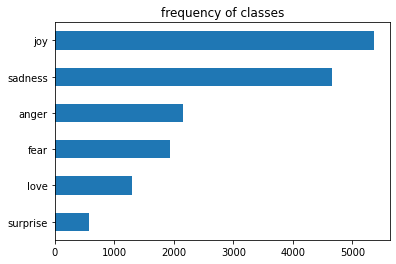

In [ ]:
#looking at the class distribution

import matplotlib.pyplot as plt

df['label_name'].value_counts(ascending=True).plot.barh()
plt.title("frequency of classes")
plt.show()

In [ ]:
df["text"]

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
15995    i just had a very brief time in the beanbag an...
15996    i am now turning and i feel pathetic that i am...
15997                       i feel strong and good overall
15998    i feel like this was such a rude comment and i...
15999    i know a lot but i feel so stupid because i ca...
Name: text, Length: 16000, dtype: object

In [ ]:
df["text"].str.split()

0                             [i, didnt, feel, humiliated]
1        [i, can, go, from, feeling, so, hopeless, to, ...
2        [im, grabbing, a, minute, to, post, i, feel, g...
3        [i, am, ever, feeling, nostalgic, about, the, ...
4                                [i, am, feeling, grouchy]
                               ...                        
15995    [i, just, had, a, very, brief, time, in, the, ...
15996    [i, am, now, turning, and, i, feel, pathetic, ...
15997                [i, feel, strong, and, good, overall]
15998    [i, feel, like, this, was, such, a, rude, comm...
15999    [i, know, a, lot, but, i, feel, so, stupid, be...
Name: text, Length: 16000, dtype: object

In [ ]:
df["text"].str.split().apply(len)

0         4
1        21
2        10
3        18
4         4
         ..
15995    24
15996    20
15997     6
15998    14
15999    15
Name: text, Length: 16000, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


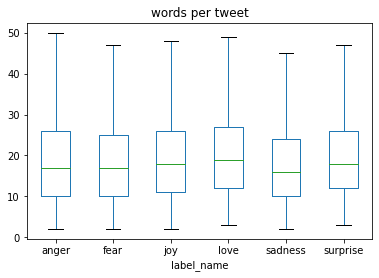

In [ ]:
df["words per tweet"]=df["text"].str.split().apply(len)
df.boxplot("words per tweet",by="label_name",grid=False,showfliers=False,color=False)
plt.suptitle("")
#plt.xlabel()
plt.show()

In [ ]:
df

,text,label,label_name,words per tweet
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness,24
15996,i am now turning and i feel pathetic that i am...,0,sadness,20
15997,i feel strong and good overall,1,joy,6
15998,i feel like this was such a rude comment and i...,3,anger,14


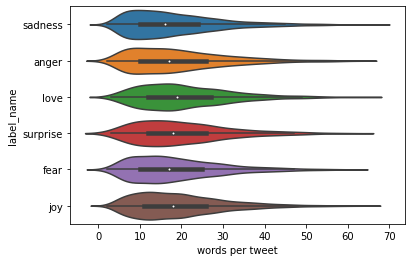

In [ ]:
import seaborn as sns
ax = sns.violinplot(x=df["words per tweet"],y=df["label_name"],data=df)


In [ ]:

emotions.reset_format() # resetting df ..we  no need anymore

In [ ]:
#from character to tokenizations

In [ ]:
text="tokenizing text is core part of nlp"
tokenized_text=list(text)
print(tokenized_text)

['t', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'c', 'o', 'r', 'e', ' ', 'p', 'a', 'r', 't', ' ', 'o', 'f', ' ', 'n', 'l', 'p']


In [ ]:
 for idx,ch in enumerate (set(tokenized_text)):
   print(idx,ch)

0 z
1 r
2 k
3 n
4  
5 o
6 c
7 g
8 t
9 e
10 a
11 s
12 x
13 f
14 l
15 p
16 i


In [ ]:
#encoding each unique token to unique integer
token2idx={ch : idx for idx,ch in enumerate  (sorted(set(tokenized_text)))}
token2idx
   


{' ': 0,
 'a': 1,
 'c': 2,
 'e': 3,
 'f': 4,
 'g': 5,
 'i': 6,
 'k': 7,
 'l': 8,
 'n': 9,
 'o': 10,
 'p': 11,
 'r': 12,
 's': 13,
 't': 14,
 'x': 15,
 'z': 16}

In [ ]:
#converting tokenized text into list of integers
input_ids=[token2idx[token] for token in tokenized_text]
input_ids
  

[14,
 10,
 7,
 3,
 9,
 6,
 16,
 6,
 9,
 5,
 0,
 14,
 3,
 15,
 14,
 0,
 6,
 13,
 0,
 2,
 10,
 12,
 3,
 0,
 11,
 1,
 12,
 14,
 0,
 10,
 4,
 0,
 9,
 8,
 11]

In [ ]:
#convert input_ids to 2D tensor of one hot vectors in pytorch
import torch 
import torch.nn.functional as F

input_ids=torch.tensor(input_ids)
input_ids
one_hot_encodings=F.one_hot(input_ids,num_classes=len(token2idx))
one_hot_encodings.shape
#For each of the 38 input tokens we now have a one-hot vector with 20 dimensions, since our vocabulary consists of 20 unique characters.

torch.Size([35, 17])

In [ ]:
print(f"{tokenized_text[0]}")
print(f"tensor index:{input_ids[0]}")
print(f"one_hot_encodings:{one_hot_encodings}")

t
tensor index:14
one_hot_encodings:tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
#word tokenization
tokenized_text=text.split()
tokenized_text


['tokenizing', 'text', 'is', 'core', 'part', 'of', 'nlp']

In [ ]:
#encoding each unique word to unique integers
input2idx={ch:idx for idx,ch in enumerate(sorted(set(tokenized_text)))}
input2idx


{'core': 0, 'is': 1, 'nlp': 2, 'of': 3, 'part': 4, 'text': 5, 'tokenizing': 6}

In [ ]:
#converting tokenized text to list of integers
input_ids=[input2idx[token] for token in tokenized_text]
input_ids


[6, 5, 1, 0, 4, 3, 2]

In [ ]:
for token in tokenized_text:
  print(token)

tokenizing
text
is
core
part
of
nlp


In [ ]:
input2idx['tokenizing']

6

In [ ]:
from transformers import AutoTokenizer

model_ckpt="distilbert-base-uncased"
tokenizer=AutoTokenizer.from_pretrained(model_ckpt)
tokenizer

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

PreTrainedTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [ ]:
#load distilbert class manually
from transformers import DistilBertTokenizer
distilberttokenizer=DistilBertTokenizer.from_pretrained(model_ckpt)
distilberttokenizer

PreTrainedTokenizer(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_len=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [ ]:
??AutoTokenizer

In [ ]:
#examining how the tokenizer works
encoded_text=tokenizer(text)
print(encoded_text)#for unique tokens unique integers has mapped

{'input_ids': [101, 19204, 6026, 3793, 2003, 4563, 2112, 1997, 17953, 2361, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
#we can convert input_ids back to tokens
tokens=tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
tokens

['[CLS]',
 'token',
 '##izing',
 'text',
 'is',
 'core',
 'part',
 'of',
 'nl',
 '##p',
 '[SEP]']

In [ ]:
#inspecting vocab_size
tokenizer.vocab_size

30522

In [ ]:
tokenizer.model_max_length

512

In [ ]:
tokenizer.model_input_names#name of the fields model expects in forward pass

['input_ids', 'attention_mask']

In [ ]:
#tokenizing the whole dataset
#function to tokenize
def tokenize(batch):
  return tokenizer(batch["text"],padding=True,truncation=True)

In [ ]:
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [ ]:
emotions_encoded=emotions.map(tokenize,batched=True,batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
print(emotions_encoded["train"].column_names)
"""input tensor and attention mask has same tensor globally and new columns has added to emotions data frame"""

                                              

['text', 'label', 'input_ids', 'attention_mask']


'input tensor and attention mask has same tensor globally and new columns has added to emotions data frame'

In [ ]:
#training a text classifier
from transformers import AutoModel

model_ckpt="distilbert-base-uncased"
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=AutoModel.from_pretrained(model_ckpt).to(device)
#The AutoModel class converts the token encodings(each tokens) to embeddings(for each token there is list of integers or float), and then feeds them through the encoder stack to return the hidden states. 

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
#distilbert in tensor flow byusing tf automodel
#from transformers import TFAutoModel

#TFAutoModel.from_pretrained(model_ckpt)

In [ ]:
#xlmroberta model
#tf_xlmr=TFAutoModel.from_pretrained("xlm-roberta-base")#this will give error
#tf_xlmr=TFAutoModel.from_pretrained("xlm-roberta-base",from_pt=True)#this will convert pytorch weights 



In [ ]:
#extracting last hidden states
text="this is a test"
inputs=tokenizer(text,return_tensors="pt")
print(f"input tensors {inputs['input_ids'].size()}")#convert the text into pytorch tokens by using return_tensor=pt
#resulting tensor has [batch_size,n_tokens]

input tensors torch.Size([1, 6])


In [ ]:
# Now that we have the encodings as a tensor, the final step is to place them on the same device as the model and pass the inputs as follows:
for k,v in inputs.items():
  print(k,v)

input_ids tensor([[ 101, 2023, 2003, 1037, 3231,  102]])
attention_mask tensor([[1, 1, 1, 1, 1, 1]])


In [ ]:
inputs = {k:v.to(device)for k,v in inputs.items()} # Imran
with torch.no_grad():
  outputs=model(**inputs)
  print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [ ]:
# The current model returns only one attribute, which is the last hidden state, so let’s examine its shape:
outputs.last_hidden_state.size()#Looking at the hidden state tensor, we see that it has the shape [batch_size, n_tokens, hidden_dim]. In other words, a 768-dimensional vector is returned for each of the 6 input tokens.

torch.Size([1, 6, 768])

In [ ]:
# For classification tasks, it is common practice to just use the hidden state associated with the [CLS] token as the input feature. Since this token appears at the start of each sequence, we can extract it by simply indexing into outputs.last_hidden_state as follows:
outputs.last_hidden_state[:,0].size()

torch.Size([1, 768])

In [ ]:
#Now we know how to get the last hidden state for a single string; let’s do the same for the whole dataset by creating a new hidden_state column that stores all these vectors. As we did with the tokenizer, we’ll use the map() method of DatasetDict to extract all the hidden states in one go.
#place model inputs on gpu
def extract_hidden_states(batch):
    inputs= {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}
   #extract last hidden states
    with torch.no_grad():
      last_hidden_state=model(**inputs).last_hidden_state
     #return vector for [cls] token
      return {"hidden_state":last_hidden_state[:,0].cpu().numpy()}




In [ ]:
#Since our model expects tensors as inputs, the next thing to do is convert the input_ids and attention_mask columns to the "torch" format, as follows:
emotions_encoded.set_format("torch",columns=["input_ids","attention_mask","label"])

In [ ]:
#We can then go ahead and extract the hidden states across all splits in one go:
emotions_hidden=emotions_encoded.map(extract_hidden_states,batched=True)

  0%|          | 0/16 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [ ]:
emotions_hidden["train"].column_names#Now that we have the hidden states associated with each tweet, the next step is to train a classifier on them. To do that, we’ll need a feature matrix—let’s take a look.

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [ ]:
# creating feature matrix
# We will use the hidden states as input features and the labels as targets. We can easily create the corresponding arrays in the well-known Scikit-learn format as follows:
import numpy as np
x_train=np.array(emotions_hidden["train"]["hidden_state"])
x_valid=np.array(emotions_hidden["validation"]["hidden_state"])
y_train=np.array(emotions_hidden["train"]["label"])
y_valid=np.array(emotions_hidden["validation"]["label"])


In [ ]:
#visualizing training set
#visualizing the hidden state in 768 dimension is tricky,instead we use UMAPalgorithm to visualize the hidden state in 2d dimension,first we will apply minmax scaler and use UMAP algorithm,since umap works best when features lies in interval[0,1]

from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

#scale the features[0,1] interval
X_scaled=MinMaxScaler().fit_transform(x_train)

#initialize and fit umap
mapper=UMAP(n_components=2,metric="cosine").fit(X_scaled)

#create a dataframe of 2D embeddings
df_emb=pd.DataFrame(mapper.embedding_,columns=["x","y"])
df_emb["label"]=y_train
df_emb.head()

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


,x,y,label
0,4.812984,6.325066,0
1,-2.850906,5.967068,0
2,5.387006,2.864721,3
3,-2.148224,4.006930,2
4,-3.030123,3.990911,3


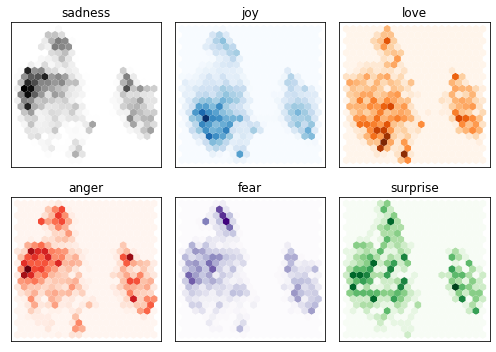

In [ ]:
#lets investigate the compressed data and plot density of points each category seprately
fig,axes=plt.subplots(2,3, figsize=(7,5))
axes=axes.flatten()
cmaps=["Greys","Blues","Oranges","Reds","Purples","Greens"] #Imran
labels=emotions["train"].features["label"].names

for i,(label,cmap) in enumerate(zip(labels,cmaps)):  #Imran
  df_emb_sub=df_emb.query(f"label=={i}")
  axes[i].hexbin(df_emb_sub["x"],df_emb_sub["y"],cmap=cmap,gridsize=20,linewidths=(0,))
  axes[i].set_title(label)
  axes[i].set_xticks([]),axes[i].set_yticks([])

plt.tight_layout()
plt.show()  

In [ ]:
#training a simple classifier
#lets use hidden states to train a logistic regression model wit scikit learn .training such a model is fat and does not require GPU
from sklearn.linear_model import  LogisticRegression

lr_clf=LogisticRegression(max_iter=3000)
lr_clf.fit(x_train,y_train)
lr_clf.score(x_valid,y_valid)

0.633

In [ ]:
 #In Scikit-learn there is a DummyClassifier that can be used to build a classifier with simple heuristics such as always choosing the majority class or always drawing a random class. In this case the best-performing heuristic is to always choose the most frequent class, which yields an accuracy of about 35%:
from sklearn.dummy import DummyClassifier
dummy_clf=DummyClassifier(strategy="most_frequent")
dummy_clf.fit(x_train,y_train)
dummy_clf.score(x_valid,y_valid)

0.352

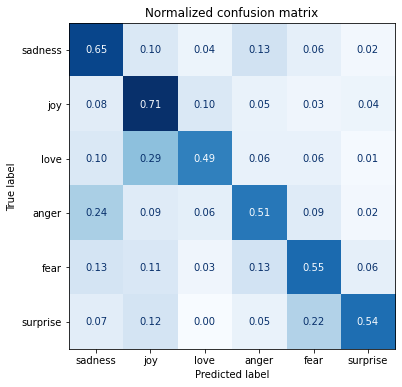

In [ ]:
#We can further investigate the performance of the model by looking at the confusion matrix of the classifier, which tells us the relationship between the true and predicted labels

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true,labels):
  cm=confusion_matrix(y_preds,y_true,normalize="true")
  fig,ax=plt.subplots(figsize=(6,6))
  disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
  disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
  plt.title("Normalized confusion matrix")
  plt.show()

y_preds=lr_clf.predict(x_valid)
plot_confusion_matrix(y_preds,y_valid,labels)



#fine tuning transformer
In fine tunning transformer,hidden state is not used as feature to train model,model is trained from end to end

#loading fine tuning transformer
The first thing we need is pretrained distillbert transformer AutoModelForSequenceClassification model instead of AutoModel .The difference is that pretrainned model is placed on the head of base model,we need to only specify number of outputs to predict(in our case is 6)

In [ ]:
from transformers import AutoModelForSequenceClassification

num_labels=6
model=(AutoModelForSequenceClassification.from_pretrained(model_ckpt,num_labels=num_labels).to(device))

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias', 'pre_classifier

Defining the performance metric

In [ ]:
from sklearn.metrics import accuracy_score,f1_score

def compute_metrics(pred):
  labels=pred.label_ids
  preds=pred.predictions.argmax(-1)
  f1=f1_score(labels,preds,average="weighted")
  acc=accuracy_score(labels,preds)
  return  {"accuracy": acc, "f1": f1}


To define the training parameters we use TrainingArguments class.this stores lots of information and control over training and evaluation.


In [ ]:
from transformers import Trainer, TrainingArguments

batch_size=64*2
logging_steps=len(emotions_encoded["train"])//batch_size
model_name=f"{model_ckpt}-fine_tuned_emotion"
training_args=TrainingArguments(output_dir=model_name,
                                num_train_epochs=2,
                                learning_rate=2e-5,
                                per_device_train_batch_size=batch_size,
                                per_device_eval_batch_size=batch_size,
                                weight_decay=0.01,
                                evaluation_strategy="epoch",
                                disable_tqdm=False,
                                logging_steps=logging_steps,
                                push_to_hub=False, #True, -- Imran
                                log_level="error"
                                )

In [ ]:
training_args.device

device(type='cuda', index=0)

Trainning the model

In [ ]:
from transformers import Trainer
trainer=Trainer(model=model,args=training_args,
                compute_metrics=compute_metrics,
                train_dataset=emotions_encoded["train"],
                eval_dataset=emotions_encoded["validation"],
                tokenizer=tokenizer)
trainer.train();

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.026400,0.535399,0.822000,0.796386
2,0.413800,0.336483,0.902500,0.900115


To visualize confusion matrix ,we forst need to get predictions on validation sets.The predict method of trainner class returns several useful objects

In [ ]:
preds_output=trainer.predict(emotions_encoded["validation"])

 the metrics on the validation set can be accessed as follows:

In [ ]:
preds_output.metrics

{'test_accuracy': 0.9025,
 'test_f1': 0.9001148696132952,
 'test_loss': 0.3364828824996948,
 'test_runtime': 8.4686,
 'test_samples_per_second': 236.167,
 'test_steps_per_second': 1.889}

with the predictions we can plot confusion matrix

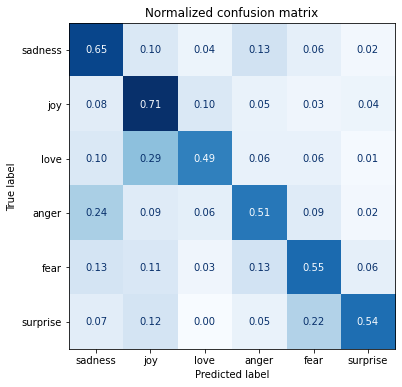

In [ ]:
plot_confusion_matrix(y_preds,y_valid,labels)

error analysis
Before moving on, we should investigate our model’s predictions a little bit further. A simple yet powerful technique is to sort the validation samples by the model loss. When we pass the label during the forward pass, the loss is automatically calculated and returned. Here’s a function that returns the loss along with the predicted label:

In [ ]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
  #place all the input tensors on same device as the model
  inputs={k:v.to(device) for k,v in batch.items()
          if k in tokenizer.model_input_names}

  with torch.no_grad():
    output=model(**inputs)
    pred_label=torch.argmax(output.logits,axis=-1)
    loss=cross_entropy(output.logits,batch["label"].to(device),
                       reduction="none")
#place outputs on cpu for compatibility with other dataset columns
  return {"loss":loss.cpu().numpy(),
         "predicted_label":pred_label.cpu().numpy()} 

Using the map() method once more, we can apply this function to get the losses for all the samples:

In [ ]:
#convert our dataset back to pytorch tensor
emotions_encoded.set_format("torch",columns=["input_ids","attention_mask","label"])
#compute loss values
emotions_encoded["validation"]=emotions_encoded["validation"].map(forward_pass_with_label,batched=True,batch_size=16)

  0%|          | 0/125 [00:00<?, ?ba/s]

finally we create a datframe with text,losses, and predicted/true labels:

In [ ]:
emotions_encoded.set_format("pandas")
cols=["text","label","predicted_label","loss"]
df_test=emotions_encoded["validation"][:][cols]
df_test["label"]=df_test["label"].apply(label_int2str)
df_test["predicted_label"]=(df_test["predicted_label"].apply(label_int2str))

Let’s first have a look at the data samples with the highest losses:

In [ ]:
df_test.sort_values("loss",ascending=False).head(10)

,text,label,predicted_label,loss
1801,i feel that he was being overshadowed by the s...,love,sadness,5.080567
882,i feel badly about reneging on my commitment t...,love,sadness,5.002937
1963,i called myself pro life and voted for perry w...,joy,sadness,4.995529
1870,i guess i feel betrayed because i admired him ...,joy,sadness,4.824758
1274,i am going to several holiday parties and i ca...,joy,sadness,4.804181
1500,i guess we would naturally feel a sense of lon...,anger,sadness,4.726032
1950,i as representative of everything thats wrong ...,surprise,sadness,4.590137
765,i feel super awkward and out of place right now,joy,sadness,4.481349
1509,i guess this is a memoir so it feels like that...,joy,fear,4.306112
539,i feel i should say what i want since you are ...,joy,anger,4.179311


we can clearly see models predicted some of the labels incorrectly.in particular joy seems to be mislabel several times

So, let’s also look at the predictions with the smallest loss:

In [ ]:
df_test.sort_values("loss",ascending=True).head(10)

,text,label,predicted_label,loss
1861,im tired of feeling lethargic hating to work o...,sadness,sadness,0.033729
69,i have no extra money im worried all of the ti...,sadness,sadness,0.034953
1984,i have i feel pathetic for lying if i say no,sadness,sadness,0.035822
861,i am feeling awfully lonely today and i dont w...,sadness,sadness,0.035838
1152,i feel pathetic because i shouldn t complain a...,sadness,sadness,0.036061
1303,i feel pathetic and uninspired,sadness,sadness,0.036124
1466,i feel so ungrateful to be wishing this pregna...,sadness,sadness,0.036137
394,i feel shamed that i hoped for one last christ...,sadness,sadness,0.036176
1140,i do think about certain people i feel a bit d...,sadness,sadness,0.036263
1452,i always feel guilty and come to one conclusio...,sadness,sadness,0.036292


**Saving and sharing** **models** **bold text**

In [ ]:
trainer.push_to_hub(commit_message="trainning Completed")

ValueError: ignored

We can also use the fine-tuned model to make predictions on new tweets. Since we’ve pushed our model to the Hub, we can now use it with the pipeline() function,

In [ ]:
pipeline??

Object `pipeline` not found.


In [ ]:
from transformers import pipeline
classifier=pipeline("text-classification",model=model)

Exception: ignored

The lets test the pipeline with sample tweet:

In [ ]:
custom_tweet="I saw a movie it was really good"
preds=classifier(custom_tweet,return_all_score=True)

Finally we can plot the bar plot probability for each class.

In [ ]:
preds_df=pd.DataFrame(preds[0])
plt.bar(labels,100*preds_df["score"],color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel("class probability(%)")
plt.show()
